  image = imageio.imread(filename)



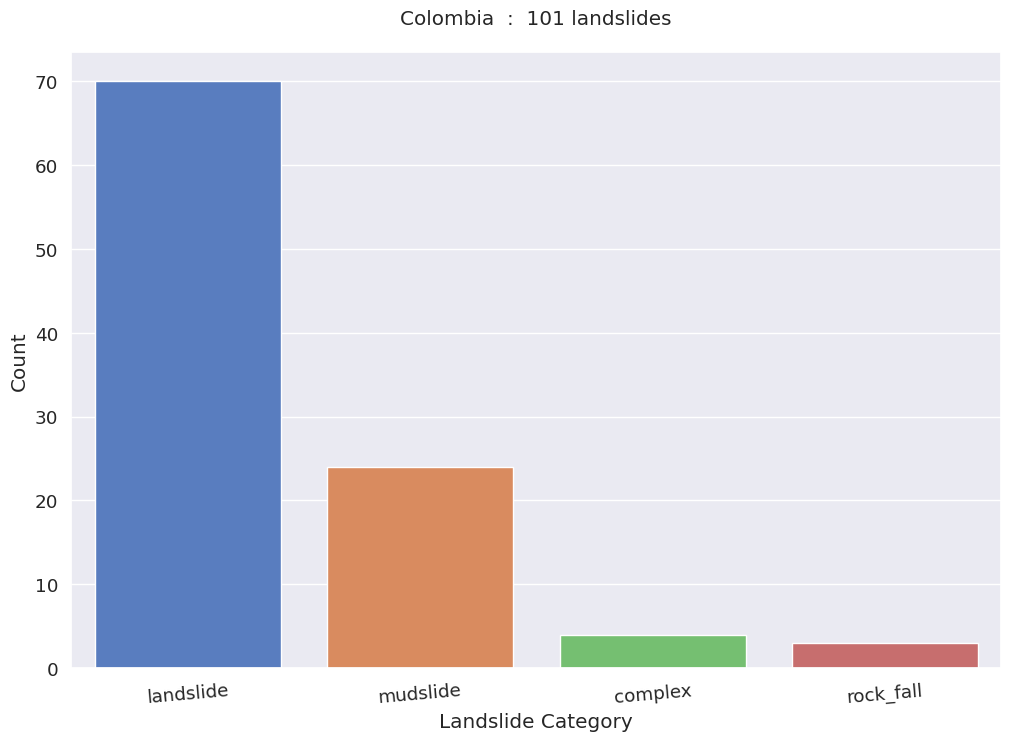

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imageio

# Read in data from a CSV file
data = pd.read_csv('Global_Landslide_Catalog_Export.csv')

# Get the top 15 countries with the most landslides
top_countries = data['country_name'].value_counts().nlargest(15).index

# Set up a matplotlib figure
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 8))

# Create a function to generate a plot for each country
def plot_country(country):
    # Filter the data to only include the current country
    country_data = data[data['country_name'] == country]
    
    # Check if there is data available for the current country
    if len(country_data) > 0:
        # Create a count plot of landslide_category
        ax.clear()
        sns.countplot(x='landslide_category', data=country_data, palette='muted')
        ax.set_xlabel('Landslide Category')
        ax.set_ylabel('Count')
        ax.set_title(country+'  :  '+f'{len(country_data)} landslides', pad=20,y=1.0)
        plt.xticks(rotation=5)

        # Save the plot to a temporary file
        filename = f'{country}.png'
        fig.savefig(filename)
        
        # Return the filename
        return filename
    else:
        # Return None if there is no data available for the current country
        return None

# Generate a list of filenames for each country
filenames = [plot_country(country) for country in top_countries]

# Remove any None values from the filenames list
filenames = [filename for filename in filenames if filename is not None]

# Use imageio to create a video from the images
with imageio.get_writer('savita_bhabhi.mp4', fps=1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

